# Movie Recommendation System

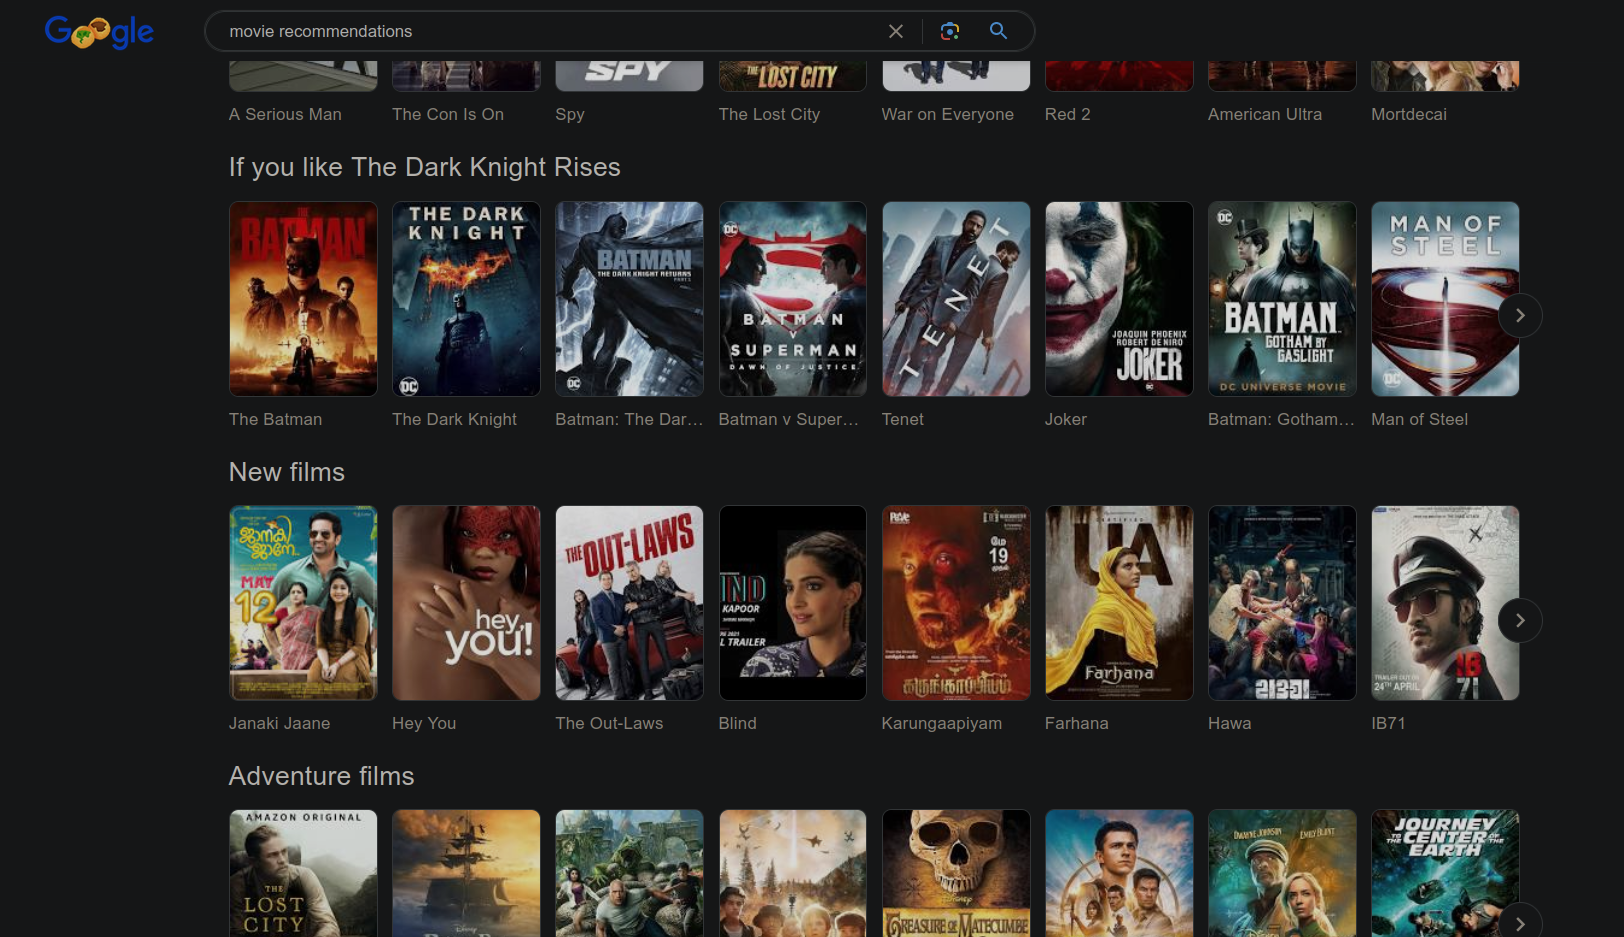

Wondered how Google comes up with movies that are similar to the ones you like? After reading this post you will be able to build one such recommendation system for yourself.

It turns out that there are (mostly) three ways to build a recommendation engine:

1. Popularity based recommendation engine
2. Content based recommendation engine
3. Collaborative filtering based recommendation engine

Now you might be thinking “That’s interesting. But, what are the differences between these recommendation engines?”. Let me help you out with that.

### Popularity based recommendation engine:

Perhaps, this is the simplest kind of recommendation engine that you will come across. The trending list you see in YouTube or Netflix is based on this algorithm. It keeps a track of view counts or vote average for each movie/video and then lists movies based on them in descending order. Pretty simple but, effective. Right?


### Content based recommendation engine:

This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents (storyline, genre, cast, director etc.) of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.

### Collaborative filtering based recommendation engine:

This algorithm at first tries to find similar users based on their activities and preferences (for example, both the users watch same type of movies or movies directed by the same director). Now, between these users(say, A and B) if user A has seen a movie that user B has not seen yet, then that movie gets recommended to user B and vice-versa. In other words, the recommendations get filtered based on the collaboration between similar user’s preferences (thus, the name “Collaborative Filtering”). One typical application of this algorithm can be seen in the Amazon e-commerce platform, where you get to see the “Customers who viewed this item also viewed” and “Customers who bought this item also bought” list.

Look at the following picture to get a better intuition over content based and collaborative filtering based recommendation systems-

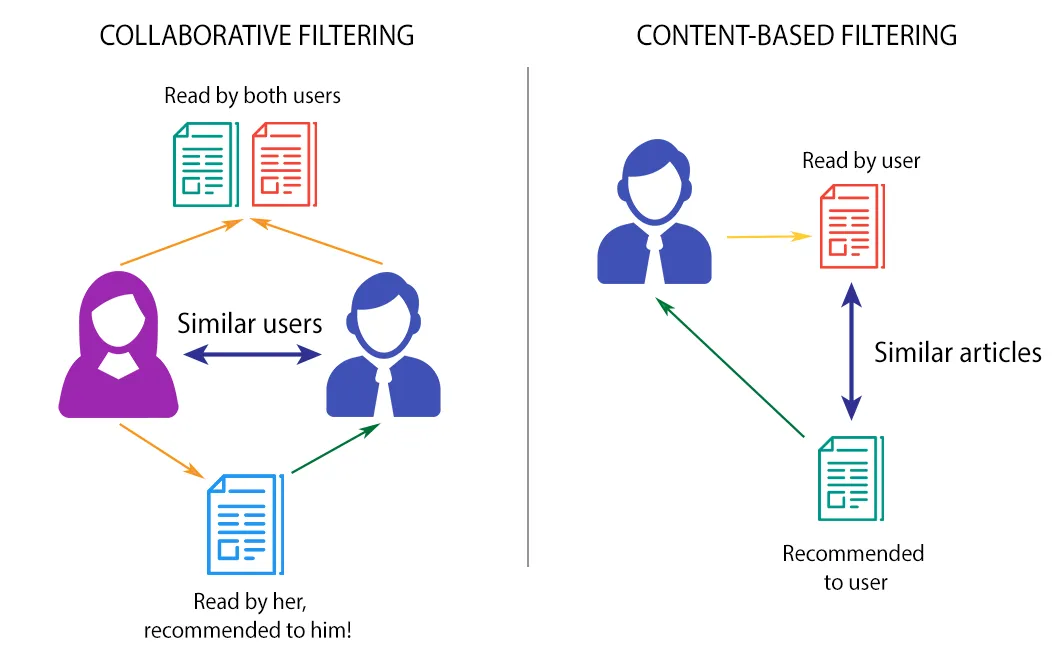

Another type of recommendation system can be created by mixing properties of two or more types of recommendation systems. This type of recommendation systems are known as hybrid recommendation system.

In this project, we are going to implement a Content based recommendation system using the scikit-learn library.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
movies_dataset = pd.read_csv('movie_dataset.csv')

print(f"No. of movies:", movies_dataset.shape[0])
print(f"No. of features:", movies_dataset.shape[1])

No. of movies: 4803
No. of features: 24


In [3]:
movies_dataset.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

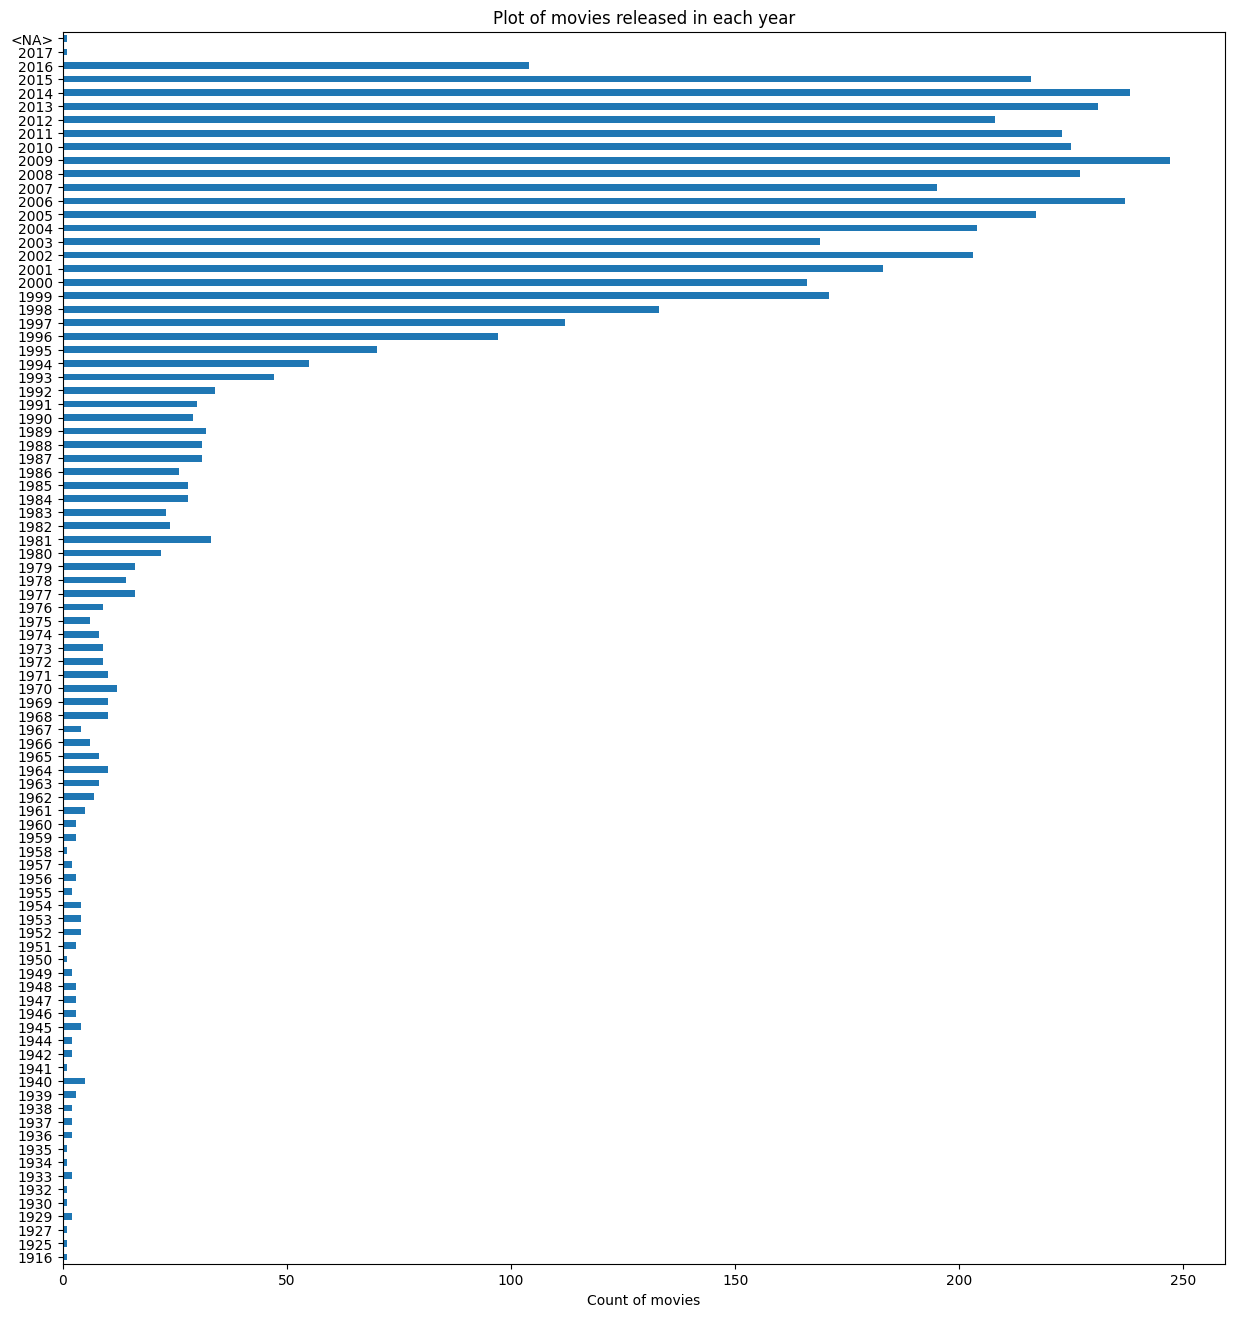

In [5]:
# release_date column is of type object so we convert it to datatime object and extract year
# into a new column 'realease_year'
movies_dataset['release_date'] = pd.to_datetime(movies_dataset['release_date'],
                                                errors='coerce')
movies_dataset['release_year'] = movies_dataset['release_date'].dt.year # get year from datetime object
movies_dataset['release_year'] = movies_dataset['release_year'].astype('Int64') # convert to int

# horizontal bar plot to analyze release date of all movies
movies_dataset['release_year'].value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(15, 16))
plt.title('Plot of movies released in each year')
plt.xlabel('Count of movies')
plt.show()

As we can see in the plot, we have movies data from the year 1916-2016 and most of them are from the last 2 decades

# Data Preprocessing

Now we need to check whether textual data of non-english movies are given in english or not

In [6]:
movies_dataset['original_language'].value_counts(normalize=True) * 100

en    93.795544
fr     1.457422
es     0.666250
zh     0.562149
de     0.562149
hi     0.395586
ja     0.333125
it     0.291484
cn     0.249844
ru     0.229024
ko     0.229024
pt     0.187383
da     0.145742
sv     0.104102
nl     0.083281
fa     0.083281
th     0.062461
he     0.062461
ta     0.041641
cs     0.041641
ro     0.041641
id     0.041641
ar     0.041641
vi     0.020820
sl     0.020820
ps     0.020820
no     0.020820
ky     0.020820
hu     0.020820
pl     0.020820
af     0.020820
nb     0.020820
tr     0.020820
is     0.020820
xx     0.020820
te     0.020820
el     0.020820
Name: original_language, dtype: float64

As we can almost 94% of movies have the original language as english.
Let's check whether textual data of french movies are given in english or french

In [7]:
movies_dataset[movies_dataset['original_language'] == 'fr'].head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,release_year
235,235,97250400,Fantasy Adventure Comedy Family,http://www.asterixauxjeuxolympiques.com/index.php,2395,competition greece colosseum olympic games emp...,fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471,Clovis Cornillac G\u00e9rard Depardieu Franck ...,"[{'name': 'Thierry Arbogast', 'gender': 2, 'de...",Thomas Langmann,2008
474,474,0,Mystery Drama Horror,NaN,330770,nurse sea beach boy pregnant,fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47,Max Brebant Roxane Duran Julie-Marie Parmentie...,"[{'name': 'Lucile Hadzihalilovic', 'gender': 0...",Lucile Hadzihalilovic,2015
861,861,47000000,Drama,NaN,2841,paris prostitute loss of lover amnesia bodily ...,fr,Un long dimanche de fiançailles,"In 1919, Mathilde was 19 years old. Two years ...",23.054510,...,"[{""iso_639_1"": ""co"", ""name"": """"}, {""iso_639_1""...",Released,Never let go,A Very Long Engagement,7.1,346,Audrey Tautou Gaspard Ulliel Dominique Pinon C...,"[{'name': 'Jean-Pierre Jeunet', 'gender': 2, '...",Jean-Pierre Jeunet,2004
985,985,60000000,Adventure Drama Action History War,NaN,10047,schizophrenia france rape siege biography,fr,Joan of Arc,In 1429 a teenage girl from a remote French vi...,21.084542,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Messenger: The Story of Joan of Arc,6.2,367,Milla Jovovich Dustin Hoffman Faye Dunaway Joh...,"[{'name': 'Luc Besson', 'gender': 2, 'departme...",Luc Besson,1999
1140,1140,33000000,Action Comedy Crime,NaN,27936,unemployment contortionist human cannonball,fr,Micmacs à tire-larigot,A man and his friends come up with an intricat...,7.663515,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,Non Stop Madness,Micmacs,6.8,148,Dany Boon Dominique Pinon Andr\u00e9 Dussollie...,"[{'name': 'Jean-Pierre Jeunet', 'gender': 2, '...",Jean-Pierre Jeunet,2009


The texts are in english so we don't need to drop the non-english movies from the dataframe. Now let's check how many movies are released movies in the dataset

In [8]:
movies_dataset['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

Most of them have released. Now we will select only the required features from the dataframe and put it in a new dataframe

In [9]:
selected_features = [
    'id', 'title', 'release_year', 'overview', 'genres', 'popularity', 'keywords', 'cast', 'director',
    'vote_average', 'vote_count'
]

movies_dataset_cleaned = movies_dataset[selected_features]
movies_dataset_cleaned.head()

,id,title,release_year,overview,genres,popularity,keywords,cast,director,vote_average,vote_count
0,19995,Avatar,2009,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,150.437577,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,7.2,11800
1,285,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,139.082615,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,6.9,4500
2,206647,Spectre,2015,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,107.376788,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,6.3,4466
3,49026,The Dark Knight Rises,2012,Following the death of District Attorney Harve...,Action Crime Drama Thriller,112.312950,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,7.6,9106
4,49529,John Carter,2012,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,43.926995,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,6.1,2124


In [10]:
# check null value counts of all features
movies_dataset_cleaned.isnull().sum()

id                0
title             0
release_year      1
overview          3
genres           28
popularity        0
keywords        412
cast             43
director         30
vote_average      0
vote_count        0
dtype: int64

The genres, keywords, cast and director columns have many null values. We will remove all the movies from the dataset where it's genre, keywords, cast and director fields are empty

In [11]:
# drop all rows where the values in the 'genres', 'keywords', 'cast', and 'director'
# column of that row is null
movies_dataset_cleaned.dropna(how='all', subset=['genres', 'keywords', 'cast', 'director'], inplace=True)
movies_dataset_cleaned.shape

C:\Users\Dipan Mondal\AppData\Local\Temp\ipykernel_21160\18591103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dataset_cleaned.dropna(how='all', subset=['genres', 'keywords', 'cast', 'director'], inplace=True)


(4790, 11)

 Two or more movies released in different years can have the same name. This may create a confusion if they are recommended together. Lets check how many duplicate movies are there in the dataset

In [12]:
movies_dataset_cleaned['title'].duplicated().sum()

3

In [13]:
movies_dataset_cleaned['title'].value_counts().sort_values(ascending=False)

The Host                     2
Out of the Blue              2
Batman                       2
Corpse Bride                 1
John Carter                  1
                            ..
Newlyweds                    1
Signed, Sealed, Delivered    1
Shanghai Calling             1
Breaking Upwards             1
My Date with Drew            1
Name: title, Length: 4787, dtype: int64

The three duplicate movies are 'Batman', 'Out of the Blue' and 'The Host'. To solve our problem we will display the release year of the movie along with the name which we will do at the last stage.

In [14]:
movies_dataset_cleaned.head()

,id,title,release_year,overview,genres,popularity,keywords,cast,director,vote_average,vote_count
0,19995,Avatar,2009,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,150.437577,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,7.2,11800
1,285,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,139.082615,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,6.9,4500
2,206647,Spectre,2015,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,107.376788,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,6.3,4466
3,49026,The Dark Knight Rises,2012,Following the death of District Attorney Harve...,Action Crime Drama Thriller,112.312950,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,7.6,9106
4,49529,John Carter,2012,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,43.926995,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,6.1,2124


# Popularity based Recommendation System

### 1. Using Weighted average for each movie's  Average Rating

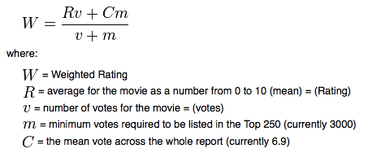

                  Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page

We will use 'vote_count' and 'vote_average' to calculate the weighted average rating of each movie. We will use the 70th percentile value of vote_counts for 'm' in the above formula

In [15]:
# Calculate all the components based on the above formula
v = movies_dataset_cleaned['vote_count']
R = movies_dataset_cleaned['vote_average']
C = movies_dataset_cleaned['vote_average'].mean()
m = movies_dataset_cleaned['vote_count'].quantile(0.70) # 70th percentile

In [16]:
# create a new datset
new_movies_dataset_wa = pd.DataFrame(movies_dataset_cleaned)

# calculate weighted average score
new_movies_dataset_wa['weighted_average'] = ((R * v) + (C * m)) / (v + m) # W

In [17]:
new_movies_dataset_wa.head()

,id,title,release_year,overview,genres,popularity,keywords,cast,director,vote_average,vote_count,weighted_average
0,19995,Avatar,2009,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,150.437577,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,7.2,11800,7.148536
1,285,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,139.082615,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,6.9,4500,6.808968
2,206647,Spectre,2015,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,107.376788,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,6.3,4466,6.277531
3,49026,The Dark Knight Rises,2012,Following the death of District Attorney Harve...,Action Crime Drama Thriller,112.312950,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,7.6,9106,7.510196
4,49529,John Carter,2012,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,43.926995,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,6.1,2124,6.101100


In [18]:
new_movies_dataset_wa[['title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,title,vote_count,vote_average,weighted_average,popularity
0,Avatar,11800,7.2,7.148536,150.437577
1,Pirates of the Caribbean: At World's End,4500,6.9,6.808968,139.082615
2,Spectre,4466,6.3,6.277531,107.376788
3,The Dark Knight Rises,9106,7.6,7.510196,112.312950
4,John Carter,2124,6.1,6.101100,43.926995
5,Spider-Man 3,3576,5.9,5.928710,115.699814
6,Tangled,3330,7.4,7.207356,48.681969
7,Avengers: Age of Ultron,6767,7.3,7.205372,134.279229
8,Harry Potter and the Half-Blood Prince,5293,7.4,7.271724,98.885637
9,Batman v Superman: Dawn of Justice,7004,5.7,5.731081,155.790452


Text(0, 0.5, 'Movie Title')

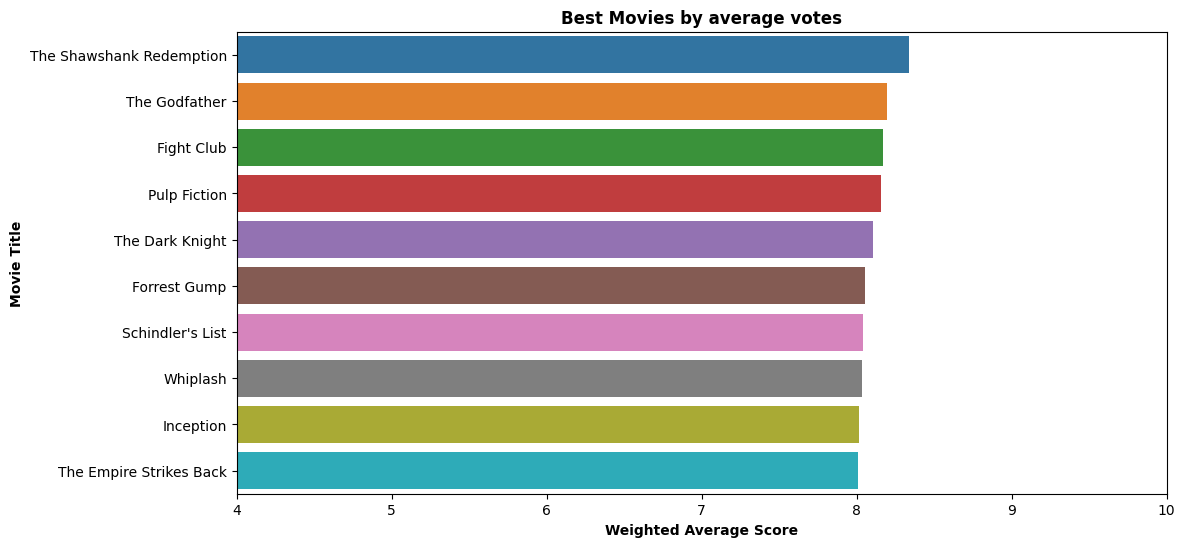

In [19]:
# sort the new dataset according to weighted average score and put it in a new dataset
movie_sorted_ranking = new_movies_dataset_wa.sort_values('weighted_average', ascending=False)

# create bar plot for best movies based on weighted average score
plt.figure(figsize=(12, 6))
sns.barplot(x = movie_sorted_ranking['weighted_average'].head(10),
                    y = movie_sorted_ranking['title'].head(10),
                    data=movie_sorted_ranking)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

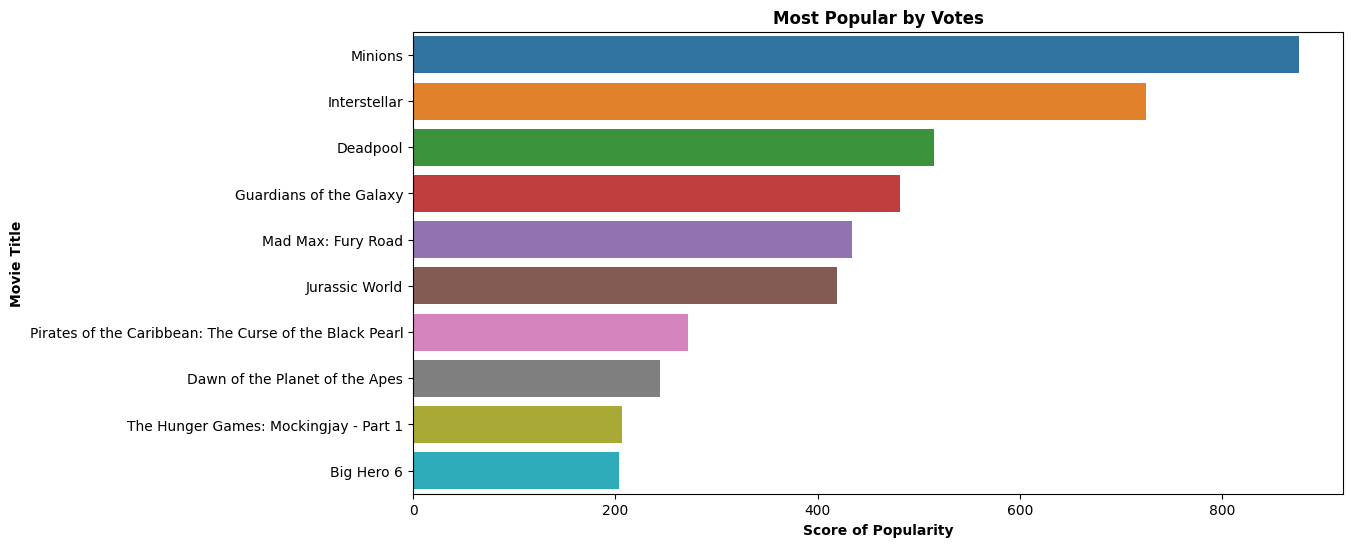

In [20]:
# sort the new dataset according to popularity and put it in a new dataset
popularity = new_movies_dataset_wa.sort_values('popularity', ascending=False)

# create bar plot for best movies based on popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=popularity['popularity'].head(10),
                 y=popularity['title'].head(10),
                 data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

### 2. Recommendation based on scaled weighted average and popularity score (Priority is given 50% to both)

Now we will use the weighted average score calculated earlier and the popularity of the movie to recommend movies. Priority is given 50% to each score which we can change according to our liking

The weighted_average score and popularity score are not scaled properly. We will use min-max scaler to scale them

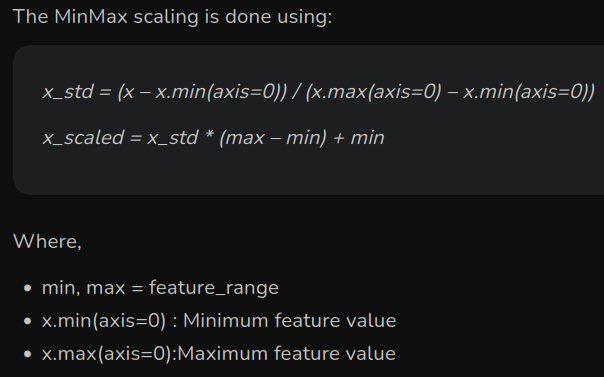

Source: https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
movie_scaled_df = scaling.fit_transform(new_movies_dataset_wa[['weighted_average','popularity']])
movie_normalized_df = pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])

movie_normalized_df.head()

,weighted_average,popularity
0,0.673607,0.171814
1,0.580693,0.158846
2,0.435277,0.122634
3,0.772567,0.128272
4,0.387001,0.050169


The scores are properly scaled now

In [22]:
new_movies_dataset_wa[['normalized_weight_average','normalized_popularity']] = movie_normalized_df

In [23]:
# change priority according to your liking
priority = [0.5, 0.5]

# calculate combined score
new_movies_dataset_wa['score'] = new_movies_dataset_wa['normalized_weight_average'] * priority[0] + new_movies_dataset_wa['normalized_popularity'] * priority[1]

new_movies_dataset_wa[['title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,title,normalized_weight_average,normalized_popularity,score
0,Avatar,0.673607,0.171814,0.422711
1,Pirates of the Caribbean: At World's End,0.580693,0.158846,0.369769
2,Spectre,0.435277,0.122634,0.278956
3,The Dark Knight Rises,0.772567,0.128272,0.450419
4,John Carter,0.387001,0.050169,0.218585
5,Spider-Man 3,0.339831,0.132140,0.235985
6,Tangled,0.689702,0.055599,0.372651
7,Avengers: Age of Ultron,0.689159,0.153360,0.421259
8,Harry Potter and the Half-Blood Prince,0.707315,0.112937,0.410126
9,Batman v Superman: Dawn of Justice,0.285754,0.177928,0.231841


Text(0, 0.5, 'Movie Title')

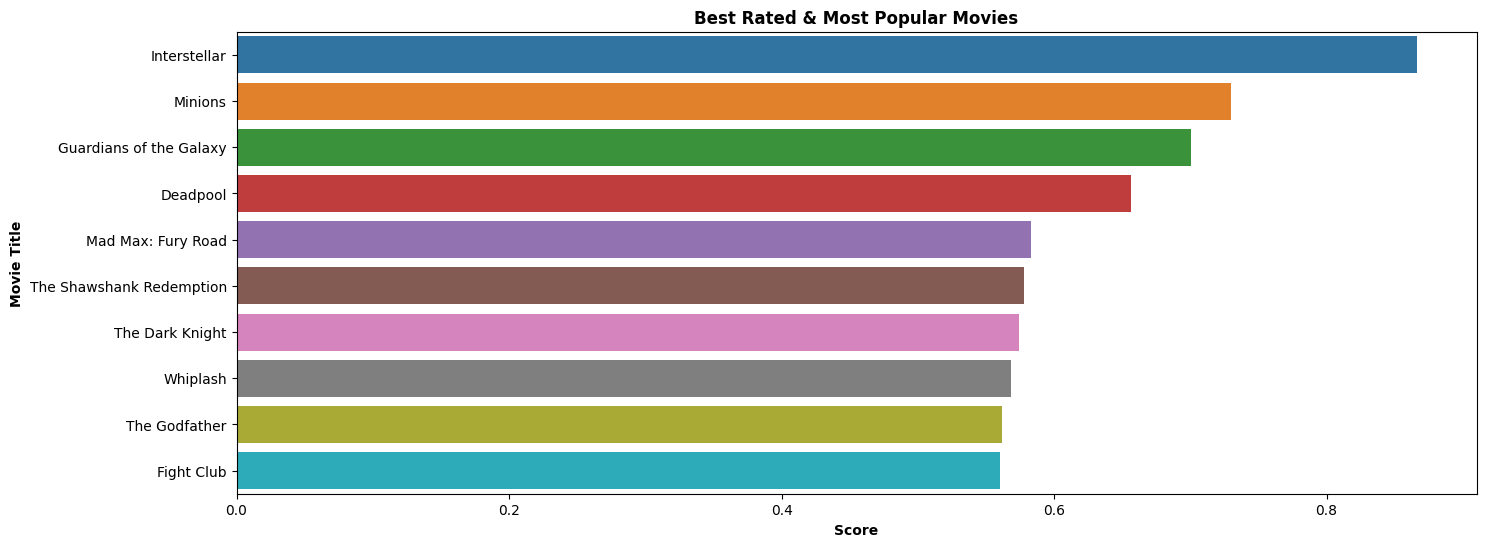

In [24]:
# create bar plot for best movies based on combined score
movies_scored_df = new_movies_dataset_wa.sort_values(['score'], ascending=False)

# create bar plot for best movies based on combined score
plt.figure(figsize=(16,6))

sns.barplot(x=movies_scored_df['score'].head(10), y=movies_scored_df['title'].head(10), data=movies_scored_df)

plt.title('Best Rated & Most Popular Movies', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

These are the top 10 best rated & most popular movies from our dataset

# Content based recommendation system

In [25]:
movies_dataset_cleaned

,id,title,release_year,overview,genres,popularity,keywords,cast,director,vote_average,vote_count,weighted_average
0,19995,Avatar,2009,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,150.437577,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,7.2,11800,7.148536
1,285,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,139.082615,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,6.9,4500,6.808968
2,206647,Spectre,2015,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,107.376788,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,6.3,4466,6.277531
3,49026,The Dark Knight Rises,2012,Following the death of District Attorney Harve...,Action Crime Drama Thriller,112.312950,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,7.6,9106,7.510196
4,49529,John Carter,2012,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,43.926995,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,6.1,2124,6.101100
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,1992,El Mariachi just wants to play his guitar and ...,Action Crime Thriller,14.269792,united states\u2013mexico barrier legs arms pa...,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,6.6,238,6.248752
4799,72766,Newlyweds,2011,A newlywed couple's honeymoon is upended by th...,Comedy Romance,0.642552,NaN,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,5.9,5,6.103368
4800,231617,"Signed, Sealed, Delivered",2013,"""Signed, Sealed, Delivered"" introduces a dedic...",Comedy Drama Romance TV Movie,1.444476,date love at first sight narration investigati...,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,7.0,6,6.114246
4801,126186,Shanghai Calling,2012,When ambitious New York attorney Sam is sent t...,NaN,0.857008,NaN,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,5.7,7,6.100300


In [26]:
selected_features_cb = [
    'id', 'title', 'release_year', 'overview', 'genres', 'keywords', 'cast', 'director'
]

new_movies_dataset_cb = movies_dataset_cleaned[selected_features_cb]
new_movies_dataset_cb.head()

,id,title,release_year,overview,genres,keywords,cast,director
0,19995,Avatar,2009,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,285,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,206647,Spectre,2015,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,49026,The Dark Knight Rises,2012,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,49529,John Carter,2012,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [27]:
#replacing the null values with null string
for feature in selected_features_cb:
    new_movies_dataset_cb[feature] = new_movies_dataset_cb[feature].fillna('')

/tmp/ipykernel_12180/3910146118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb[feature] = new_movies_dataset_cb[feature].fillna('')


In [28]:
new_movies_dataset_cb.isnull().sum()

id              0
title           0
release_year    0
overview        0
genres          0
keywords        0
cast            0
director        0
dtype: int64

In [29]:
# preprocessing genres column
# combine genres : Science and Fiction ----> ScienceFiction
def combine_genres(s):
    l = s.split()
    res = []
    
    for i in range(len(l)):
        if l[i] == 'Science':
            res.append('ScienceFiction')
        else:
            res.append(l[i])
            
    return " ".join(res)
        
new_movies_dataset_cb['genres'] = new_movies_dataset_cb['genres'].astype('str').apply(combine_genres)
new_movies_dataset_cb['genres'][0]

/tmp/ipykernel_12180/395356109.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb['genres'] = new_movies_dataset_cb['genres'].astype('str').apply(combine_genres)


'Action Adventure Fantasy ScienceFiction Fiction'

In [30]:
# preprocessing cast column
# combine cast names: Sam Worthington ----> SamWorthington
def combine_cast(s):
    l = s.split()
    res = []
    
    for i in range(0, len(l)-1, 2):
        res.append(l[i] + l[i+1])
            
    return " ".join(res)

new_movies_dataset_cb['cast'] = new_movies_dataset_cb['cast'].astype('str').apply(combine_cast)
new_movies_dataset_cb['cast'][0]

/tmp/ipykernel_12180/2517347431.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb['cast'] = new_movies_dataset_cb['cast'].astype('str').apply(combine_cast)


'SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez'

In [31]:
# preprocessing director column
# combine director names: James Cameron ----> JamesCameron
new_movies_dataset_cb['director'] = new_movies_dataset_cb['director'].apply(lambda x: "".join(x.split()))
new_movies_dataset_cb['director']

/tmp/ipykernel_12180/2618285425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb['director'] = new_movies_dataset_cb['director'].apply(lambda x: "".join(x.split()))


0           JamesCameron
1          GoreVerbinski
2              SamMendes
3       ChristopherNolan
4          AndrewStanton
              ...       
4798     RobertRodriguez
4799         EdwardBurns
4800          ScottSmith
4801          DanielHsia
4802     BrianHerzlinger
Name: director, Length: 4790, dtype: object

In [32]:
# combine features
new_movies_dataset_cb['tags'] = new_movies_dataset_cb['overview'] + " " + new_movies_dataset_cb['genres'] + " " + new_movies_dataset_cb['keywords'] + " " + new_movies_dataset_cb['cast'] + " " + new_movies_dataset_cb['director']


/tmp/ipykernel_12180/2895928072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb['tags'] = new_movies_dataset_cb['overview'] + " " + new_movies_dataset_cb['genres'] + " " + new_movies_dataset_cb['keywords'] + " " + new_movies_dataset_cb['cast'] + " " + new_movies_dataset_cb['director']


In [33]:
new_movies_dataset_cb.drop(['overview', 'genres', 'keywords', 'cast', 'director'], axis=1, inplace=True)

/tmp/ipykernel_12180/210355600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb.drop(['overview', 'genres', 'keywords', 'cast', 'director'], axis=1, inplace=True)


In [34]:
new_movies_dataset_cb.head()

,id,title,release_year,tags
0,19995,Avatar,2009,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,2015,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,2012,Following the death of District Attorney Harve...
4,49529,John Carter,2012,"John Carter is a war-weary, former military ca..."


In [35]:
new_movies_dataset_cb['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction Fiction culture clash future space war space colony society SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez JamesCameron'

In [36]:
# stemming to remove related words
# [love, loving, loved] ----> [love, love, love]

import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [37]:
# stem each word in the string
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)


new_movies_dataset_cb['tags'] = new_movies_dataset_cb['tags'].apply(stem)

/tmp/ipykernel_12180/2951770829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb['tags'] = new_movies_dataset_cb['tags'].apply(stem)


In [38]:
new_movies_dataset_cb['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict fiction cultur clash futur space war space coloni societi samworthington zoesaldana sigourneyweav stephenlang michellerodriguez jamescameron'

In [39]:
# convert to lowercase
new_movies_dataset_cb['tags'] = new_movies_dataset_cb['tags'].apply(lambda x: x.lower())

/tmp/ipykernel_12180/951180640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_dataset_cb['tags'] = new_movies_dataset_cb['tags'].apply(lambda x: x.lower())


In [40]:
new_movies_dataset_cb['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict fiction cultur clash futur space war space coloni societi samworthington zoesaldana sigourneyweav stephenlang michellerodriguez jamescameron'

# 1. Bag of words algorithm

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=3, stop_words='english')
cv.fit(new_movies_dataset_cb['tags'])

CountVectorizer(min_df=3, stop_words='english')

In [42]:
cv.vocabulary_

{'22nd': 100,
 'century': 1425,
 'parapleg': 6366,
 'marin': 5445,
 'dispatch': 2482,
 'moon': 5868,
 'pandora': 6353,
 'uniqu': 8981,
 'mission': 5810,
 'becom': 829,
 'torn': 8722,
 'follow': 3249,
 'order': 6260,
 'protect': 6816,
 'alien': 348,
 'civilization': 1621,
 'action': 185,
 'adventur': 233,
 'fantasi': 3098,
 'sciencefict': 7589,
 'fiction': 3168,
 'cultur': 2046,
 'clash': 1637,
 'futur': 3393,
 'space': 8019,
 'war': 9243,
 'coloni': 1747,
 'societi': 7959,
 'samworthington': 7522,
 'zoesaldana': 9510,
 'sigourneyweav': 7835,
 'stephenlang': 8152,
 'michellerodriguez': 5717,
 'jamescameron': 4371,
 'captain': 1324,
 'long': 5242,
 'believ': 852,
 'dead': 2213,
 'ha': 3696,
 'come': 1759,
 'life': 5158,
 'head': 3815,
 'edg': 2704,
 'earth': 2677,
 'turner': 8843,
 'elizabeth': 2764,
 'noth': 6139,
 'quit': 6893,
 'ocean': 6179,
 'drug': 2620,
 'abus': 159,
 'exot': 3019,
 'island': 4310,
 'east': 2683,
 'india': 4145,
 'trade': 8751,
 'compani': 1784,
 'love': 5275,
 'j

In [43]:
vectors_cv = cv.transform(new_movies_dataset_cb['tags'])

In [44]:
print(vectors_cv)

  (0, 100)	1
  (0, 185)	1
  (0, 233)	1
  (0, 348)	1
  (0, 829)	1
  (0, 1425)	1
  (0, 1621)	1
  (0, 1637)	1
  (0, 1747)	1
  (0, 2046)	1
  (0, 2482)	1
  (0, 3098)	1
  (0, 3168)	1
  (0, 3249)	1
  (0, 3393)	1
  (0, 4371)	1
  (0, 5445)	1
  (0, 5717)	1
  (0, 5810)	1
  (0, 5868)	1
  (0, 6260)	1
  (0, 6353)	1
  (0, 6366)	1
  (0, 6816)	1
  (0, 7522)	1
  :	:
  (4789, 2516)	1
  (4789, 2601)	2
  (4789, 2605)	2
  (4789, 2606)	1
  (4789, 2913)	1
  (4789, 3182)	1
  (4789, 3378)	1
  (4789, 3528)	1
  (4789, 3587)	1
  (4789, 3635)	1
  (4789, 3696)	1
  (4789, 3880)	1
  (4789, 4527)	1
  (4789, 5033)	1
  (4789, 5159)	1
  (4789, 6053)	1
  (4789, 6168)	1
  (4789, 6205)	1
  (4789, 6764)	1
  (4789, 7560)	1
  (4789, 7646)	1
  (4789, 7857)	1
  (4789, 7928)	1
  (4789, 8797)	1
  (4789, 9474)	2


In [45]:
vectors_cv.shape

(4790, 9517)

# 2. TF - IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3, stop_words = 'english')
vectors_tfv = tfv.fit_transform(new_movies_dataset_cb['tags'])

In [47]:
print(vectors_tfv)

  (0, 4371)	0.21356842342211418
  (0, 5717)	0.20712405890892738
  (0, 8152)	0.21742479732562967
  (0, 7835)	0.18435348542218694
  (0, 9510)	0.1954142651970384
  (0, 7522)	0.2101668605682067
  (0, 7959)	0.1600717472653843
  (0, 1747)	0.19179956554714375
  (0, 9243)	0.10037378046936662
  (0, 8019)	0.2836091120012276
  (0, 3393)	0.14150527969782006
  (0, 1637)	0.17637531421129807
  (0, 2046)	0.16637488946892204
  (0, 3168)	0.09036112329202554
  (0, 7589)	0.09240796747030369
  (0, 3098)	0.09796859417724793
  (0, 233)	0.07882071367141785
  (0, 185)	0.068669859503638
  (0, 1621)	0.21742479732562967
  (0, 348)	0.13761171338121148
  (0, 6816)	0.1346470711871626
  (0, 6260)	0.12723302645625642
  (0, 3249)	0.11961408618852615
  (0, 8722)	0.17738874818588876
  (0, 829)	0.0932915516391924
  :	:
  (4789, 3378)	0.1504806712236923
  (4789, 3182)	0.14595791544644213
  (4789, 2606)	0.14950505316898977
  (4789, 1158)	0.16513345338675064
  (4789, 2145)	0.1285819425633506
  (4789, 4527)	0.1476657363466856

In [48]:
vectors_cv.shape

(4790, 9517)

# Cosine similarity

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_cv = cosine_similarity(vectors_cv)
similarity_tfv = cosine_similarity(vectors_tfv)

In [50]:
similarity_cv[0]

array([1.        , 0.08000711, 0.05198752, ..., 0.02158664, 0.        ,
       0.        ])

In [51]:
similarity_tfv[0]

array([1.        , 0.02176229, 0.01080804, ..., 0.01641932, 0.        ,
       0.        ])

In [52]:
# recommend top num similar movies based on given similarity vector
def recommend(similarity, movie, num):
    try:
        movie_index = new_movies_dataset_cb[new_movies_dataset_cb['title'] == movie].index[0]

        similar_scores = sorted(list(enumerate(similarity[movie_index])),
                                reverse=True,
                                key=lambda x: x[1])[1:num + 1]

        similar_movies = []

        for i in similar_scores:
            title = new_movies_dataset_cb.iloc[i[0]].title
            year = new_movies_dataset_cb.iloc[i[0]].release_year
            
            similar_movies.append((title, year))

        print(f"Top {num} Movie recommendations for {movie}")
        print("-----------------------------------------\n")

        for i in similar_movies:
            print(f"{i[0]} ({i[1]})")

    except IndexError:
        print("Movie not present in list!!!")

In [53]:
# Movie recommendations for Avatar using BoW vectorization
recommend(similarity_cv, 'Avatar', 10)

Top 10 Movie recommendations for Avatar
-----------------------------------------

Lifeforce (1985)
Moonraker (1979)
Silent Running (1972)
Star Trek Beyond (2016)
Guardians of the Galaxy (2014)
Aliens (1986)
Starship Troopers (1997)
The Helix... Loaded (2005)
Mad Max Beyond Thunderdome (1985)
Lockout (2012)


In [54]:
# Movie recommendations for Avatar using TF-TDF vectorization
recommend(similarity_tfv, 'Avatar', 10)

Top 10 Movie recommendations for Avatar
-----------------------------------------

Aliens (1986)
Lifeforce (1985)
The Inhabited Island (2008)
Gattaca (1997)
Silent Running (1972)
Cargo (2009)
Moonraker (1979)
Apollo 18 (2011)
Space Pirate Captain Harlock (2013)
Star Trek Beyond (2016)


In [55]:
# Movie recommendations for Dark Knight using BoW vectorization
recommend(similarity_cv, 'The Dark Knight', 10)

Top 10 Movie recommendations for The Dark Knight
-----------------------------------------

The Dark Knight Rises (2012)
Batman Begins (2005)
Batman (1989)
Amidst the Devil's Wings (2014)
Gangster's Paradise: Jerusalema (2008)
Batman Returns (1992)
Batman & Robin (1997)
The Usual Suspects (1995)
Batman Forever (1995)
Blood Ties (2013)


In [56]:
# Movie recommendations for Dark Knight using TF-IDF vectorization
recommend(similarity_tfv, 'The Dark Knight', 10)

Top 10 Movie recommendations for The Dark Knight
-----------------------------------------

The Dark Knight Rises (2012)
Batman Begins (2005)
Batman Returns (1992)
Batman Forever (1995)
Batman: The Dark Knight Returns, Part 2 (2013)
Batman (1989)
Batman & Robin (1997)
Batman v Superman: Dawn of Justice (2016)
Gangster's Paradise: Jerusalema (2008)
Slow Burn (2005)


In [57]:
# Movie recommendations for spectre using BoW vectorization
recommend(similarity_cv, 'Spectre', 20)

Top 20 Movie recommendations for Spectre
-----------------------------------------

Skyfall (2012)
Quantum of Solace (2008)
Never Say Never Again (1983)
Die Another Day (2002)
Diamonds Are Forever (1971)
From Russia with Love (1963)
Octopussy (1983)
GoldenEye (1995)
Thunderball (1965)
Safe Haven (2013)
Dr. No (1962)
Restless (2012)
Charlie's Angels: Full Throttle (2003)
The Sentinel (2006)
Goldfinger (1964)
Licence to Kill (1989)
On Her Majesty's Secret Service (1969)
Hitman (2007)
Johnny English Reborn (2011)
Thunderbirds (2004)


In [58]:
# Movie recommendations for spectre using TF-IDF vectorization
recommend(similarity_tfv, 'Spectre', 20)

Top 20 Movie recommendations for Spectre
-----------------------------------------

Skyfall (2012)
Never Say Never Again (1983)
Quantum of Solace (2008)
From Russia with Love (1963)
Die Another Day (2002)
Diamonds Are Forever (1971)
Octopussy (1983)
Restless (2012)
Thunderball (1965)
Safe Haven (2013)
Tinker Tailor Soldier Spy (2011)
Dr. No (1962)
GoldenEye (1995)
Live and Let Die (1973)
Licence to Kill (1989)
Casino Royale (2006)
The Prince of Egypt (1998)
True Lies (1994)
The Sentinel (2006)
Spy Kids: All the Time in the World (2011)


And we are done here!

After seeing the output, we went one step further to compare it to other recommendation engines.

So, we searched Google for similar movies to “Spectre” and here is what we got -

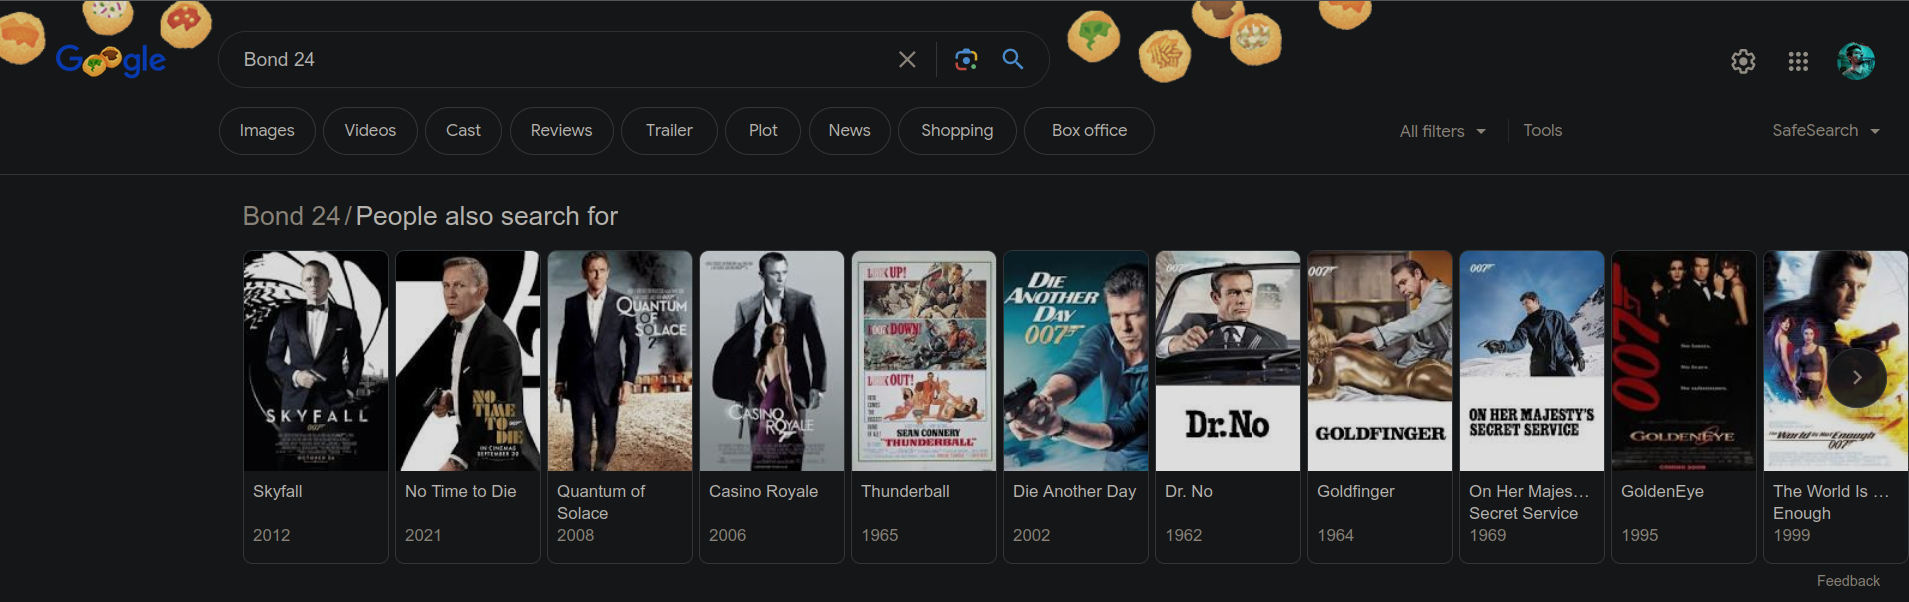

See the output? Our simple movie recommendation engine works pretty good. Right? It’s good as a basic level implementation but, it can be further improved with many other factors like user behaviour and preferences which is what is used in collaborative filtering based recommendation system